# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [50]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [2]:
df = pd.read_feather('clustered.feather')

In [3]:
df.sample(3)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
92964,4,3,1,12,8,2.0000,1,2,4,1,0,1,0,0,0,0,0,0,1.0000,2,2064.7612,10.2246,12.9189,10.7351,6.9734,27.3609,3.4965,162.7575,125,3.4214,6.7081,22.2960,0.4418,8.3763,2.1153,1.0018,1.1059,1.7185,0.1303,-2.7857,21.7049,-8.4249,58.8845,0.1478,21.8583,4.0761,0
45035,8,5,9,16,18,12.0000,0,2,0,1,0,1,1,0,0,1,1,0,2.0000,3,1876.7931,13.6102,12.8608,10.6545,8.9982,70.0881,3.1781,83.6364,49,10.6605,5.2495,13.9686,0.6559,7.2422,1.6706,0.6912,3.3937,0.6427,0.1038,-1.7185,40.5341,-8.8972,92.8169,0.1399,41.7127,3.7577,0
15453,9,10,9,36,18,10.0000,0,2,0,0,1,0,1,0,1,0,0,1,1.0000,1,3740.0125,9.4626,14.3335,12.0581,6.2708,51.6187,3.4012,93.6588,51,18.2676,7.8987,14.6690,0.5861,7.8346,1.5538,0.7447,3.1770,0.6427,0.1110,-2.0666,33.1520,-10.0341,81.0967,-0.0325,35.0884,2.0745,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   num_bank_accounts                          100000 non-null  int8   
 1   num_credit_card                            100000 non-null  int8   
 2   num_of_loan                                100000 non-null  int8   
 3   delay_from_due_date                        100000 non-null  int8   
 4   num_of_delayed_payment                     100000 non-null  int8   
 5   num_credit_inquiries                       100000 non-null  float64
 6   credit_mix                                 100000 non-null  int8   
 7   payment_of_min_amount                      100000 non-null  int8   
 8   payment_behaviour                          100000 non-null  int8   
 9   credit_score                               100000 non-null  int8   
 10  Mortgage 

## <span style="color:Aqua;">Analyzing the Data:</span>

In [5]:
df.sample(2)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
74496,7,6,5,48,16,11.0000,0,2,5,0,0,0,1,1,1,0,0,1,2.0000,0,1652.0547,6.5881,12.7787,10.3665,6.0230,66.4636,3.6376,97.3115,-39,7.5403,4.4028,20.5760,0.5582,7.4151,1.8160,0.9128,2.9127,1.1401,0.0949,-2.2057,39.1865,-8.0538,110.8902,0.0289,40.1283,4.3353,1
80505,7,3,3,18,12,2.0000,1,0,2,1,0,0,0,0,0,1,1,0,1.0000,3,1619.4635,14.4243,12.6082,10.2972,4.3379,21.3009,3.4965,110.2015,27,5.2360,6.6015,20.5059,0.4357,7.8495,1.9597,0.8673,2.2514,1.3010,0.1438,-2.8160,18.3464,-8.1130,48.3054,0.1011,18.5532,2.7706,0


In [6]:
credit_mix_cross=pd.crosstab(df['credit_score'],df['credit_mix'],margins=False)
credit_mix_cross

credit_mix,0,1,2
credit_score,,,
0,14289,9858,4851
1,9128,33361,10685
2,351,2629,14848


In [7]:
num_of_loan_cross=pd.crosstab(df['credit_score'],df['payment_behaviour'],margins=False)
num_of_loan_cross

payment_behaviour,0,1,2,3,4,5
credit_score,,,,,,
0,10175,4344,3027,3215,5073,3164
1,14736,7457,5791,6362,10711,8117
2,3705,2598,1939,2187,3954,3445


In [8]:
features = list(df.columns)
print(features,'\n',len(features))

['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score', 'Mortgage Loan', 'Home Equity Loan', 'Credit-Builder Loan', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Auto Loan', 'credit_inquiry_per_loan', 'age_group', 'disposable_income', 'age_boxcox', 'annual_income_boxcox', 'monthly_inhand_salary_boxcox', 'interest_rate_boxcox', 'outstanding_debt_square', 'credit_utilization_ratio_log', 'credit_history_age_boxcox', 'changed_credit_limit_cube', 'total_emi_per_month_square', 'amount_invested_monthly_boxcox', 'monthly_balance_boxcox', 'credit_limit_change_rate_exp', 'debt_income_ratio_log', 'loan_income_ratio_month_boxcox', 'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 'investment_to_income_ratio_square', 'credit_limit_change_rate_boxcox', 'total_credit_exposure

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [9]:
df.columns

Index(['num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries',
       'credit_mix', 'payment_of_min_amount', 'payment_behaviour',
       'credit_score', 'Mortgage Loan', 'Home Equity Loan',
       'Credit-Builder Loan', 'Payday Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Auto Loan',
       'credit_inquiry_per_loan', 'age_group', 'disposable_income',
       'age_boxcox', 'annual_income_boxcox', 'monthly_inhand_salary_boxcox',
       'interest_rate_boxcox', 'outstanding_debt_square',
       'credit_utilization_ratio_log', 'credit_history_age_boxcox',
       'changed_credit_limit_cube', 'total_emi_per_month_square',
       'amount_invested_monthly_boxcox', 'monthly_balance_boxcox',
       'credit_limit_change_rate_exp', 'debt_income_ratio_log',
       'loan_income_ratio_month_boxcox',
       'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox',
       'delayed_paymen

In [10]:
x = df.drop(['credit_score','Mortgage Loan', 'Home Equity Loan','Credit-Builder Loan', 'Payday Loan', 'Personal Loan','Debt Consolidation Loan', 'Student Loan', 'Auto Loan','credit_inquiry_per_loan', ],axis=1)
y = df[['credit_score']]

In [11]:
x.describe()

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
count,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000
mean,5.3688,5.5336,3.5329,21.0814,13.3131,5.7983,1.0662,1.1666,2.2379,2.1350,4089.5716,11.3209,13.8608,11.5778,5.2516,34.6016,3.4457,124.3568,5.5901,8.7194,7.6677,21.1963,0.5315,8.3038,1.9034,0.9265,2.2679,1.3640,0.1207,-2.3385,24.8256,-9.4823,76.0148,-0.0019,25.9091,2.9474,0.2151
std,2.5933,2.0671,2.4464,14.8046,6.2372,3.8678,0.7329,0.9231,1.8613,1.0752,3132.9336,2.5192,1.3315,1.5769,2.4293,15.1312,0.1644,50.7896,57.1509,5.2116,2.4281,4.1683,0.1295,0.9835,0.2104,0.1398,1.5732,1.0182,0.0306,0.6454,7.5147,1.3524,34.1407,0.0780,7.5197,1.7311,0.4109
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-863.3358,6.2613,11.1147,7.3497,0.0000,0.4796,2.9957,0.0000,-121.0000,0.0000,1.1662,11.4435,0.2219,5.9041,1.3983,0.5390,-1.5196,-0.9242,0.0422,-3.8818,5.1299,-13.0149,0.0000,-0.1647,5.7747,-1.0786,0.0000
25%,3.0000,4.0000,2.0000,10.0000,9.0000,3.0000,1.0000,0.0000,0.0000,1.0000,1579.0700,9.2002,12.7298,10.2740,3.2999,23.7923,3.3322,86.2900,-39.0000,5.4101,5.9981,18.6373,0.4525,7.6063,1.7683,0.8287,1.3281,0.7704,0.0997,-2.7325,19.7526,-10.5776,50.8176,-0.0425,20.8762,1.8817,0.0000
50%,5.0000,5.0000,3.0000,18.0000,14.0000,5.0000,1.0000,2.0000,2.0000,2.0000,3016.5687,11.4226,13.8046,11.5101,5.2293,34.1490,3.4657,124.8856,0.0000,8.1524,7.5257,20.4546,0.5212,8.3015,1.8874,0.9207,2.1474,1.3010,0.1155,-2.3903,25.1749,-9.4678,73.2512,-0.0016,26.0852,2.8589,0.0000
75%,7.0000,7.0000,5.0000,28.0000,18.0000,8.0000,2.0000,2.0000,4.0000,3.0000,5785.1548,13.4018,14.9368,12.8384,6.9734,44.1131,3.5835,165.6512,51.0000,12.1405,9.2194,23.4331,0.6063,9.0341,2.0151,1.0218,3.2265,1.9001,0.1381,-1.9663,29.8719,-8.3755,96.9042,0.0390,30.9438,3.8552,0.0000
max,11.0000,11.0000,9.0000,62.0000,25.0000,17.0000,2.0000,2.0000,5.0000,4.0000,15101.9400,16.1564,16.5758,14.8721,9.7112,70.6970,3.9120,213.8333,125.0000,22.2362,14.0514,30.6269,0.8369,11.1759,2.3598,1.2477,6.0742,3.5947,0.1957,-0.8171,40.8020,-6.3219,154.0589,0.1612,44.6478,6.8156,1.0000


In [12]:
y.describe()

,credit_score
count,100000.0000
mean,0.8883
std,0.6751
min,0.0000
25%,0.0000
50%,1.0000
75%,1.0000
max,2.0000


In [13]:
y.value_counts()

credit_score
1               53174
0               28998
2               17828
Name: count, dtype: int64

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [14]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [15]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(107157, 37) ---- (107157, 1)
(30000, 37) ---- (30000, 1)


## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [18]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    

    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)

In [19]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [20]:
x_train_scaled

array([[-7.55559805e-01,  8.06546152e-01, -1.39733314e-01, ...,
        -7.92791820e-01, -1.43646965e+00, -4.88182864e-01],
       [-3.79900844e-01, -1.07976635e+00, -1.39504876e+00, ...,
        -2.29388180e-01,  2.25772640e+00, -4.88182864e-01],
       [-1.50687773e+00, -1.07976635e+00, -1.39733314e-01, ...,
        -2.31992849e-02, -1.48268403e-01, -4.88182864e-01],
       ...,
       [-1.50687773e+00, -1.36610097e-01, -5.58171797e-01, ...,
         1.85423417e-01,  1.66698299e-01, -4.88182864e-01],
       [-1.13121877e+00, -1.07976635e+00, -9.76610280e-01, ...,
        -1.40479594e+00, -9.22174395e-01, -4.88182864e-01],
       [-1.88253669e+00, -1.07976635e+00, -1.39733314e-01, ...,
         4.50104925e-04, -9.48485196e-01, -4.88182864e-01]])

Accuracy Test  - 0.7242
Accuracy Train - 1.0

Precision Test  - 0.7270115433122022
Precision Train - 1.0

Recall Test  - 0.7242
Recall Train - 1.0

F1_score Test  - 0.7250234504523664
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 6535  2019   251]
 [ 2440 11559  1874]
 [  237  1453  3632]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34928     0]
 [    0     0 36512]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      8805
           1       0.77      0.73      0.75     15873
           2       0.63      0.68      0.66      5322

    accuracy                           0.72     30000
   macro avg       0.70      0.72      0.71     30000
weighted avg       0.73      0.72      0.73     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
           1       1.00      1.00      1.00     34928
           2

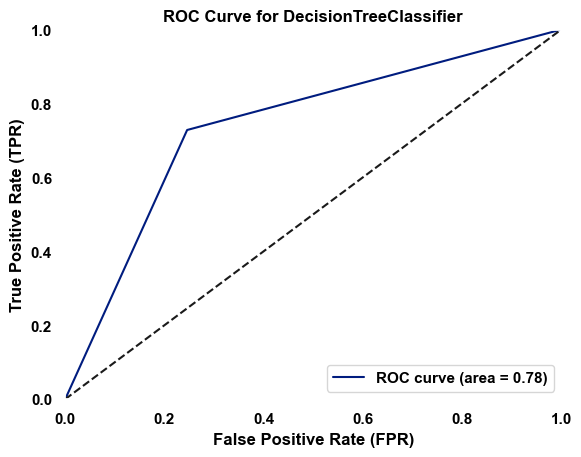

----------------------------------------


In [21]:
DT_Classifier = DecisionTreeClassifier(max_depth=None,random_state=42)
evaluate_model(DT_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

                                      Feature  Importance
6                                  credit_mix      0.1956
15                    outstanding_debt_square      0.1359
14                       interest_rate_boxcox      0.0514
17                  credit_history_age_boxcox      0.0431
3                         delay_from_due_date      0.0357
22               credit_limit_change_rate_exp      0.0305
24             loan_income_ratio_month_boxcox      0.0266
5                        num_credit_inquiries      0.0264
11                                 age_boxcox      0.0249
26                    reliable_payment_boxcox      0.0245
1                             num_credit_card      0.0232
21                     monthly_balance_boxcox      0.0230
30               total_credit_exposure_boxcox      0.0226
33                    income_stability_boxcox      0.0226
25      credit_utilization_per_account_boxcox      0.0211
23                      debt_income_ratio_log      0.0189
20            

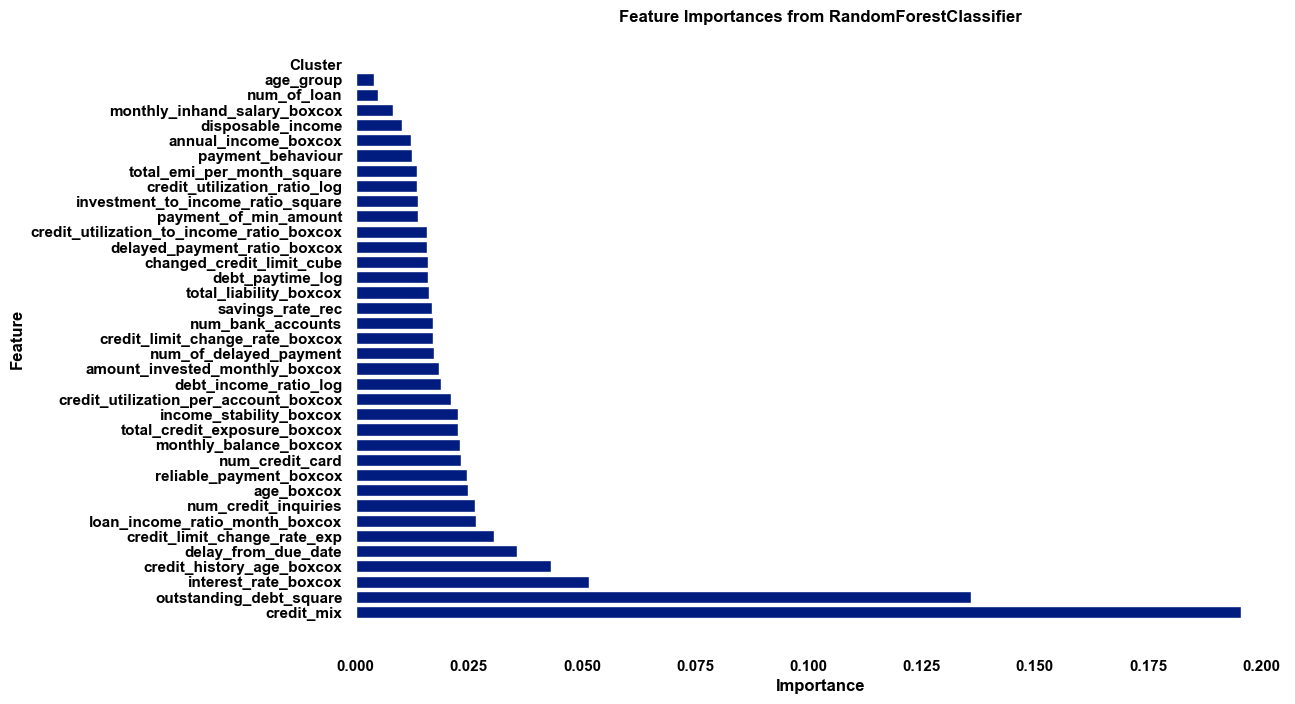

In [35]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names = x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

###
#        Feature  Importance
# 6                                  credit_mix      0.1956
# 15                    outstanding_debt_square      0.1359
# 14                       interest_rate_boxcox      0.0514
# 17                  credit_history_age_boxcox      0.0431
# 3                         delay_from_due_date      0.0357
# 22               credit_limit_change_rate_exp      0.0305
# 24             loan_income_ratio_month_boxcox      0.0266
# 5                        num_credit_inquiries      0.0264
# 11                                 age_boxcox      0.0249
# 26                    reliable_payment_boxcox      0.0245
# 1                             num_credit_card      0.0232
# 21                     monthly_balance_boxcox      0.0230
# 30               total_credit_exposure_boxcox      0.0226
# 33                    income_stability_boxcox      0.0226
# 25      credit_utilization_per_account_boxcox      0.0211
# 23                      debt_income_ratio_log      0.0189
# 20             amount_invested_monthly_boxcox      0.0185
# 4                      num_of_delayed_payment      0.0173
# 29            credit_limit_change_rate_boxcox      0.0170
# 0                           num_bank_accounts      0.0170
# 32                           savings_rate_rec      0.0169
# 34                     total_liability_boxcox      0.0162
# 35                           debt_paytime_log      0.0159
# 18                  changed_credit_limit_cube      0.0159
# 27               delayed_payment_ratio_boxcox      0.0159
# 31  credit_utilization_to_income_ratio_boxcox      0.0158
# 7                       payment_of_min_amount      0.0138
# 28          investment_to_income_ratio_square      0.0137
# 16               credit_utilization_ratio_log      0.0136
# 19                 total_emi_per_month_square      0.0135
# 8                           payment_behaviour      0.0125
# 12                       annual_income_boxcox      0.0123
# 10                          disposable_income      0.0103
# 13               monthly_inhand_salary_boxcox      0.0084
# 2                                 num_of_loan      0.0050
# 9                                   age_group      0.0041
# 36                                    Cluster      0.0003
# ###

Accuracy Test  - 0.8076
Accuracy Train - 0.9999906678985041

Precision Test  - 0.8130852500894378
Precision Train - 0.999990668154087

Recall Test  - 0.8076
Recall Train - 0.9999906678985041

F1_score Test  - 0.8080726457983268
F1_score Train - 0.9999906678956044

Confusion Matrix Test  -- 
[[ 7571  1090   144]
 [ 2054 12283  1536]
 [   31   917  4374]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34927     1]
 [    0     0 36512]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8805
           1       0.86      0.77      0.81     15873
           2       0.72      0.82      0.77      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.82      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
       

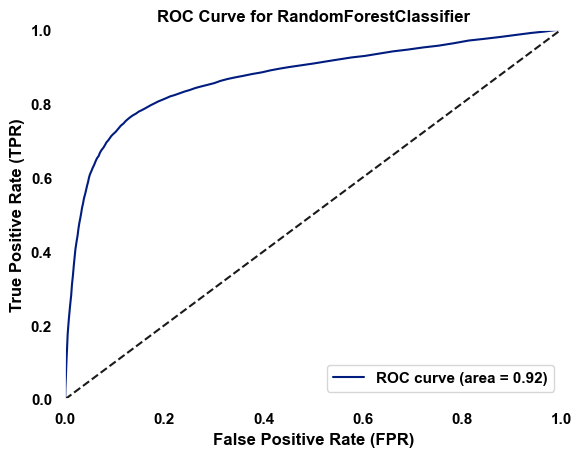

----------------------------------------


In [22]:
RF_Classifier = RandomForestClassifier(random_state=42)
evaluate_model(RF_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

                                      Feature  Importance
6                                  credit_mix      0.0805
30               total_credit_exposure_boxcox      0.0625
14                       interest_rate_boxcox      0.0614
15                    outstanding_debt_square      0.0601
34                     total_liability_boxcox      0.0511
7                       payment_of_min_amount      0.0435
3                         delay_from_due_date      0.0392
5                        num_credit_inquiries      0.0380
17                  credit_history_age_boxcox      0.0346
26                    reliable_payment_boxcox      0.0328
29            credit_limit_change_rate_boxcox      0.0323
22               credit_limit_change_rate_exp      0.0270
25      credit_utilization_per_account_boxcox      0.0248
1                             num_credit_card      0.0239
24             loan_income_ratio_month_boxcox      0.0239
4                      num_of_delayed_payment      0.0227
0             

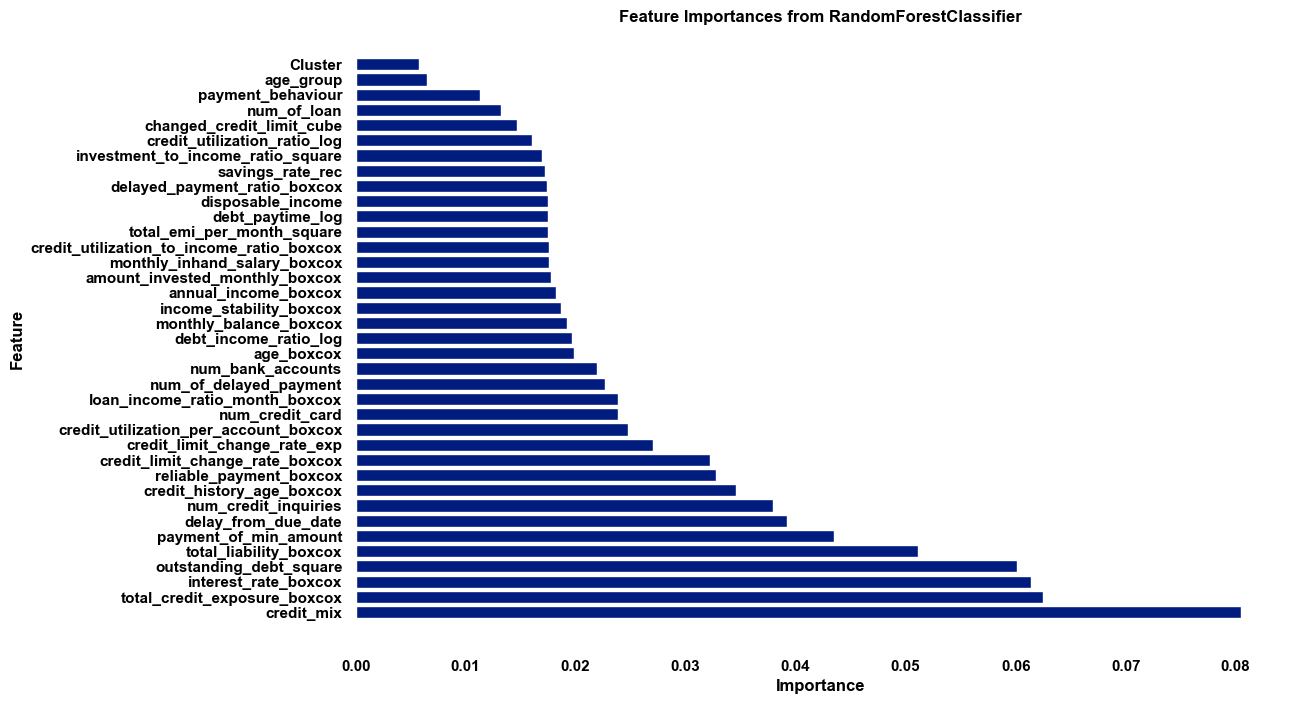

In [34]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names = x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


Accuracy Test  - 0.7645333333333333
Accuracy Train - 0.8918129473576155

Precision Test  - 0.7702233577472939
Precision Train - 0.8916432494028523

Recall Test  - 0.7645333333333333
Recall Train - 0.8918129473576155

F1_score Test  - 0.7656278829825868
F1_score Train - 0.8910511401197436

Confusion Matrix Test  -- 
[[ 6875  1611   319]
 [ 2175 11882  1816]
 [   61  1082  4179]]
Confusion Matrix Train -- 
[[32133  2226  1358]
 [ 3335 28740  2853]
 [  290  1531 34691]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      8805
           1       0.82      0.75      0.78     15873
           2       0.66      0.79      0.72      5322

    accuracy                           0.76     30000
   macro avg       0.74      0.77      0.76     30000
weighted avg       0.77      0.76      0.77     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.90   

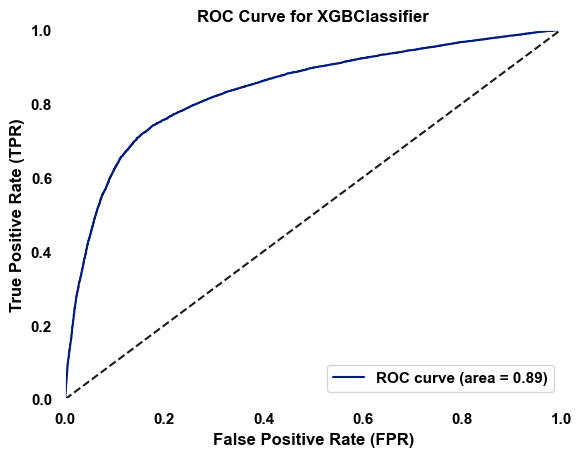

----------------------------------------


In [23]:
xgb_Classifier = xg.XGBClassifier(random_state=42)
evaluate_model(xgb_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

                                      Feature  Importance
6                                  credit_mix      0.2672
15                    outstanding_debt_square      0.1335
16               credit_utilization_ratio_log      0.0528
14                       interest_rate_boxcox      0.0489
7                       payment_of_min_amount      0.0471
29            credit_limit_change_rate_boxcox      0.0468
34                     total_liability_boxcox      0.0359
1                             num_credit_card      0.0341
30               total_credit_exposure_boxcox      0.0331
0                           num_bank_accounts      0.0286
36                                    Cluster      0.0204
5                        num_credit_inquiries      0.0194
3                         delay_from_due_date      0.0144
8                           payment_behaviour      0.0140
24             loan_income_ratio_month_boxcox      0.0138
4                      num_of_delayed_payment      0.0136
9             

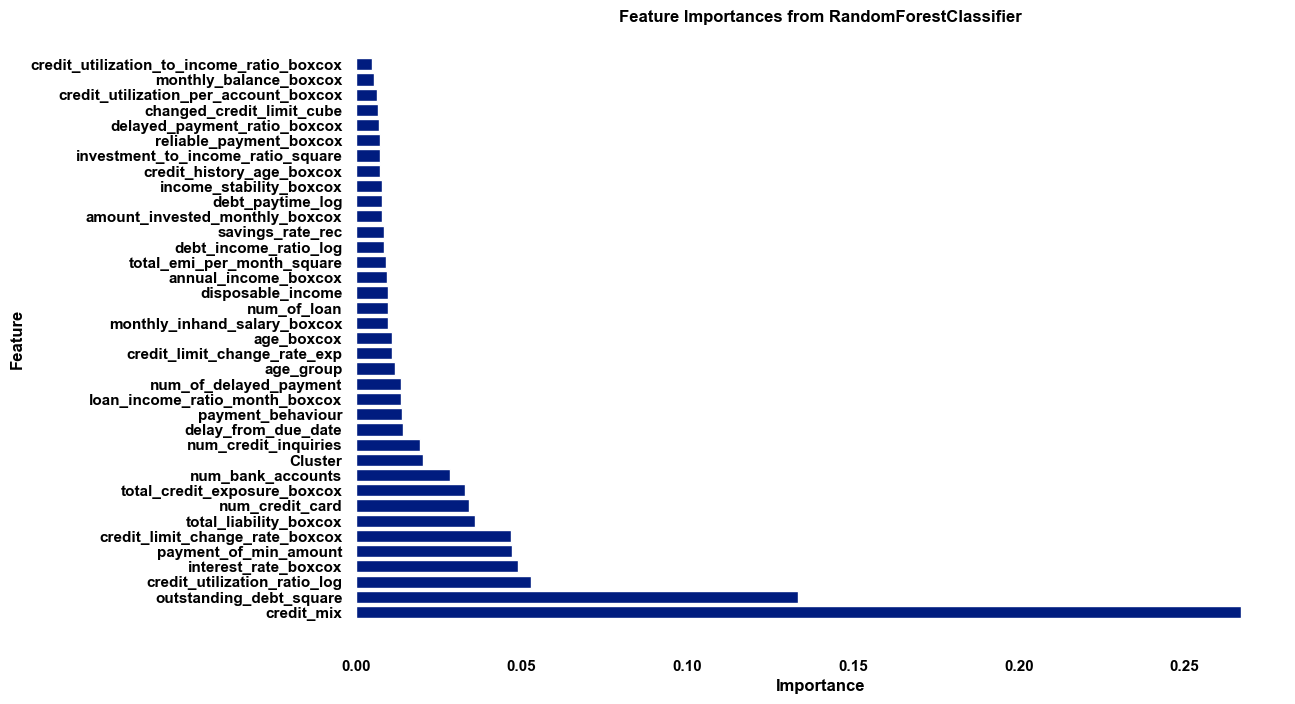

In [48]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names = x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.8073333333333333
Accuracy Train - 1.0

Precision Test  - 0.8103525668487149
Precision Train - 1.0

Recall Test  - 0.8073333333333333
Recall Train - 1.0

F1_score Test  - 0.8076742673147469
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 7466  1238   101]
 [ 1974 12470  1429]
 [   13  1025  4284]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34928     0]
 [    0     0 36512]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      8805
           1       0.85      0.79      0.81     15873
           2       0.74      0.80      0.77      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.81      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
           1       1.00      1.00      1.0

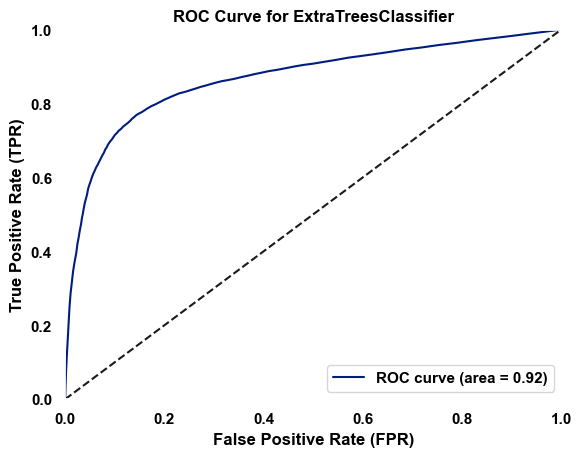

----------------------------------------


In [24]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)
evaluate_model(ET_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

                                      Feature  Importance
6                                  credit_mix      0.0931
7                       payment_of_min_amount      0.0695
14                       interest_rate_boxcox      0.0581
30               total_credit_exposure_boxcox      0.0417
15                    outstanding_debt_square      0.0393
3                         delay_from_due_date      0.0392
5                        num_credit_inquiries      0.0350
1                             num_credit_card      0.0346
17                  credit_history_age_boxcox      0.0331
26                    reliable_payment_boxcox      0.0320
34                     total_liability_boxcox      0.0296
29            credit_limit_change_rate_boxcox      0.0279
22               credit_limit_change_rate_exp      0.0251
0                           num_bank_accounts      0.0244
2                                 num_of_loan      0.0235
4                      num_of_delayed_payment      0.0225
25      credit

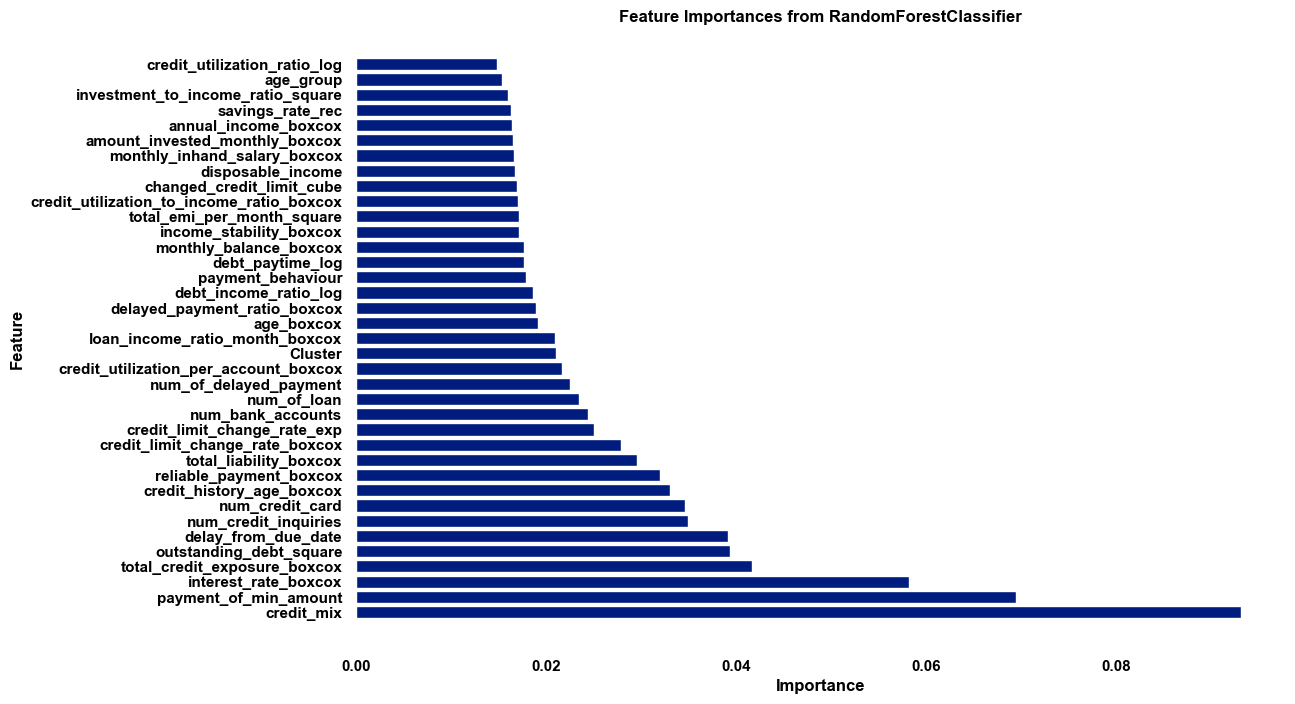

In [43]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names = x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.6965666666666667
Accuracy Train - 0.7805369691200762

Precision Test  - 0.7258963039938285
Precision Train - 0.7819237058648328

Recall Test  - 0.6965666666666667
Recall Train - 0.7805369691200762

F1_score Test  - 0.6998928088867971
F1_score Train - 0.778109858778225

Confusion Matrix Test  -- 
[[ 6481  1371   953]
 [ 2975 10094  2804]
 [  101   899  4322]]
Confusion Matrix Train -- 
[[27960  3441  4316]
 [ 5670 23303  5955]
 [  882  3253 32377]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      8805
           1       0.82      0.64      0.71     15873
           2       0.53      0.81      0.65      5322

    accuracy                           0.70     30000
   macro avg       0.68      0.73      0.69     30000
weighted avg       0.73      0.70      0.70     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.81      0.78    

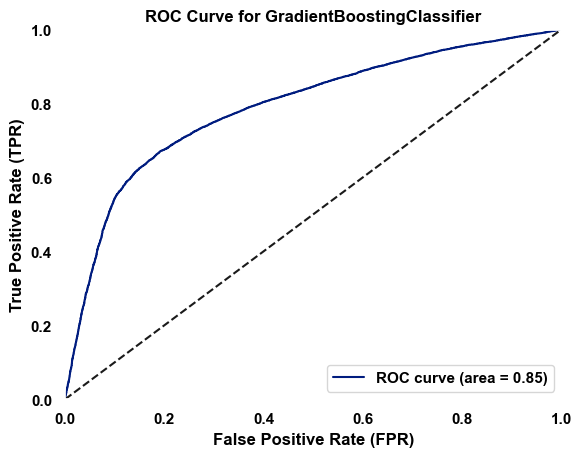

----------------------------------------


In [51]:
GBC_Classifier =GradientBoostingClassifier(random_state=42,)
evaluate_model(GBC_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

In [65]:
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled,y_train)




Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....................n_neighbors=2;, score=0.846 total time=   1.9s
[CV 2/3] END .....................n_neighbors=2;, score=0.860 total time=   2.0s
[CV 3/3] END .....................n_neighbors=2;, score=0.866 total time=   1.8s
[CV 1/3] END .....................n_neighbors=3;, score=0.848 total time=   2.1s
[CV 2/3] END .....................n_neighbors=3;, score=0.860 total time=   2.1s
[CV 3/3] END .....................n_neighbors=3;, score=0.870 total time=   1.9s
[CV 1/3] END .....................n_neighbors=4;, score=0.836 total time=   2.0s
[CV 2/3] END .....................n_neighbors=4;, score=0.851 total time=   1.9s
[CV 3/3] END .....................n_neighbors=4;, score=0.856 total time=   1.9s
[CV 1/3] END .....................n_neighbors=5;, score=0.832 total time=   1.9s
[CV 2/3] END .....................n_neighbors=5;, score=0.845 total time=   1.8s
[CV 3/3] END .....................n_neighbors=5;,

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=3)

Accuracy Test  - 0.7579666666666667
Accuracy Train - 0.9107571133943653

Precision Test  - 0.7793583753937631
Precision Train - 0.9132879460891222

Recall Test  - 0.7579666666666667
Recall Train - 0.9107571133943653

F1_score Test  - 0.7584135199110843
F1_score Train - 0.9086923368764744

Confusion Matrix Test  -- 
[[ 7541  1006   258]
 [ 2767 10735  2371]
 [  142   717  4463]]
Confusion Matrix Train -- 
[[34461   962   294]
 [ 3998 27446  3484]
 [  172   653 35687]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      8805
           1       0.86      0.68      0.76     15873
           2       0.63      0.84      0.72      5322

    accuracy                           0.76     30000
   macro avg       0.74      0.79      0.75     30000
weighted avg       0.78      0.76      0.76     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     35717
           1       0.94      0.79      0.86     34928
           2       0.90      0.98      0.94     36512

    accuracy                           0.91    107157
   macro avg       0.91      0.91      0.91    107157
weighted avg       0.91      0.91      0.91    107157

Balanced Accuracy Test  - 0.7904484637455105
Balanced Accuracy Train - 0.9093424226616387

Specificity Test - 0.7904484637455105

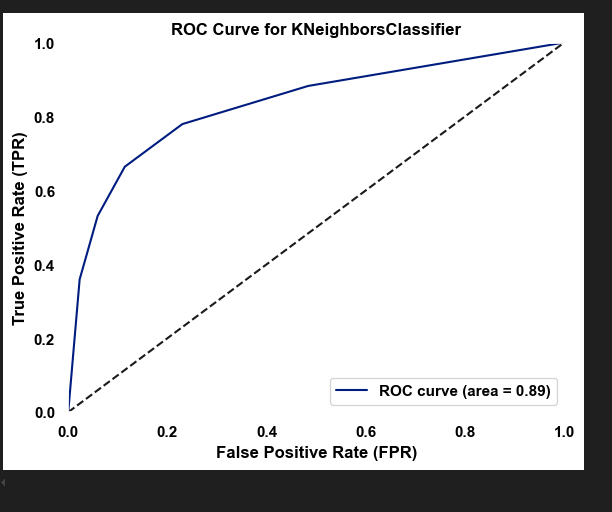

In [67]:
KNN_grid_model.best_params_

{'n_neighbors': 3}

Accuracy Test  - 0.7676333333333333
Accuracy Train - 0.9367376839590508

Precision Test  - 0.7825977844214823
Precision Train - 0.9384887127748789

Recall Test  - 0.7676333333333333
Recall Train - 0.9367376839590508

F1_score Test  - 0.7681881910657401
F1_score Train - 0.9356236554748046

Confusion Matrix Test  -- 
[[ 7516  1099   190]
 [ 2610 11152  2111]
 [  155   806  4361]]
Confusion Matrix Train -- 
[[34910   667   140]
 [ 3006 29401  2521]
 [   91   354 36067]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      8805
           1       0.85      0.70      0.77     15873
           2       0.65      0.82      0.73      5322

    accuracy                           0.77     30000
   macro avg       0.75      0.79      0.76     30000
weighted avg       0.78      0.77      0.77     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.92      0.98   

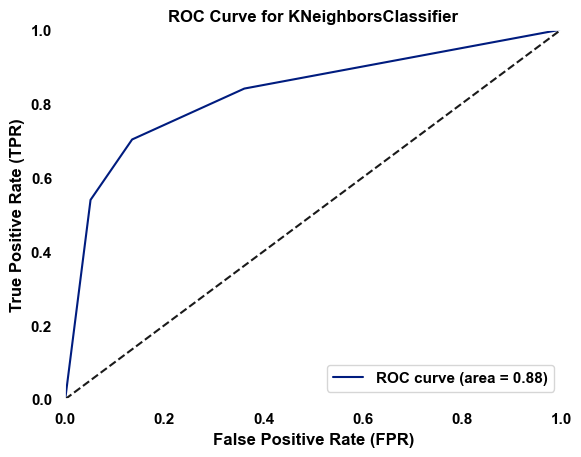

----------------------------------------


In [68]:
KN_Classifier = KNeighborsClassifier(n_neighbors=3)
evaluate_model(KN_Classifier, x_train_scaled, y_train, x_test_scaled, y_test)

In [82]:
from sklearn.inspection import permutation_importance

results = permutation_importance(KN_Classifier, x_test_scaled, y_test, scoring='accuracy')


In [88]:
feature_importances_df.to_feather('feature_importances.feather')


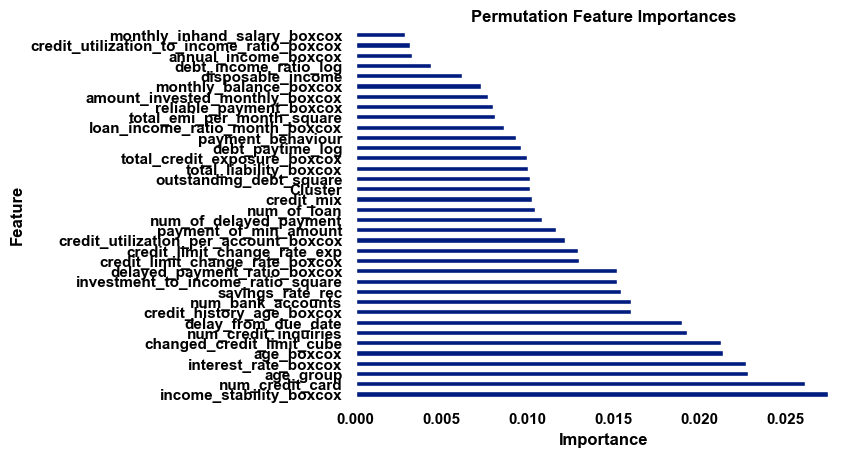

In [84]:
feature_importances_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': results.importances_mean
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the top features
feature_importances_df.nlargest(36, 'Importance').plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [26]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
RF_cv_score = cross_val_score(RF_Classifier,x_train,y_train, cv=kf)
print(f'Cross validations scores \n\n {RF_cv_score}')
print(f'Cross validations scores mean \n\n {np.mean(RF_cv_score)}')

KeyboardInterrupt: 